**FineTuning of speechT5 model for Hindi Language using IndicVoices dataset.**

In [1]:
#Installing the dependencies.
!pip install transformers datasets soundfile speechbrain accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 12.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 16.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 30.3 MB/s eta 0:00:00
  Attempting uninstall: nvid

In [2]:
#Use HuggingFace api key for Login to get access to the gated IndicVoice Dataset.

from huggingface_hub import notebook_login

notebook_login()

In [3]:
#Loading the dataset

from datasets import load_dataset, Audio

dataset = load_dataset("ai4bharat/IndicVoices", "hindi", split='train')

subset_size = len(dataset) // 4
subset = dataset.shuffle(seed = 42).select(range(subset_size))

print(len(dataset))
print(len(subset))

README.md:   0%|          | 0.00/31.4k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/66 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/47 [00:00<?, ?it/s]

valid-00000-of-00001.parquet:   0%|          | 0.00/240M [00:00<?, ?B/s]

train-00000-of-00047.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00001-of-00047.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

train-00002-of-00047.parquet:   0%|          | 0.00/449M [00:00<?, ?B/s]

train-00003-of-00047.parquet:   0%|          | 0.00/461M [00:00<?, ?B/s]

train-00004-of-00047.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00005-of-00047.parquet:   0%|          | 0.00/499M [00:00<?, ?B/s]

train-00006-of-00047.parquet:   0%|          | 0.00/458M [00:00<?, ?B/s]

train-00007-of-00047.parquet:   0%|          | 0.00/468M [00:00<?, ?B/s]

train-00008-of-00047.parquet:   0%|          | 0.00/397M [00:00<?, ?B/s]

train-00009-of-00047.parquet:   0%|          | 0.00/442M [00:00<?, ?B/s]

train-00010-of-00047.parquet:   0%|          | 0.00/411M [00:00<?, ?B/s]

train-00011-of-00047.parquet:   0%|          | 0.00/443M [00:00<?, ?B/s]

train-00012-of-00047.parquet:   0%|          | 0.00/433M [00:00<?, ?B/s]

train-00013-of-00047.parquet:   0%|          | 0.00/419M [00:00<?, ?B/s]

train-00014-of-00047.parquet:   0%|          | 0.00/434M [00:00<?, ?B/s]

train-00015-of-00047.parquet:   0%|          | 0.00/424M [00:00<?, ?B/s]

train-00016-of-00047.parquet:   0%|          | 0.00/441M [00:00<?, ?B/s]

train-00017-of-00047.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

train-00018-of-00047.parquet:   0%|          | 0.00/424M [00:00<?, ?B/s]

train-00019-of-00047.parquet:   0%|          | 0.00/412M [00:00<?, ?B/s]

train-00020-of-00047.parquet:   0%|          | 0.00/438M [00:00<?, ?B/s]

train-00021-of-00047.parquet:   0%|          | 0.00/433M [00:00<?, ?B/s]

train-00022-of-00047.parquet:   0%|          | 0.00/433M [00:00<?, ?B/s]

train-00023-of-00047.parquet:   0%|          | 0.00/444M [00:00<?, ?B/s]

train-00024-of-00047.parquet:   0%|          | 0.00/451M [00:00<?, ?B/s]

train-00025-of-00047.parquet:   0%|          | 0.00/437M [00:00<?, ?B/s]

train-00026-of-00047.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

train-00027-of-00047.parquet:   0%|          | 0.00/445M [00:00<?, ?B/s]

train-00028-of-00047.parquet:   0%|          | 0.00/416M [00:00<?, ?B/s]

train-00029-of-00047.parquet:   0%|          | 0.00/424M [00:00<?, ?B/s]

train-00030-of-00047.parquet:   0%|          | 0.00/432M [00:00<?, ?B/s]

train-00031-of-00047.parquet:   0%|          | 0.00/430M [00:00<?, ?B/s]

train-00032-of-00047.parquet:   0%|          | 0.00/412M [00:00<?, ?B/s]

train-00033-of-00047.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

train-00034-of-00047.parquet:   0%|          | 0.00/407M [00:00<?, ?B/s]

train-00035-of-00047.parquet:   0%|          | 0.00/401M [00:00<?, ?B/s]

train-00036-of-00047.parquet:   0%|          | 0.00/409M [00:00<?, ?B/s]

train-00037-of-00047.parquet:   0%|          | 0.00/448M [00:00<?, ?B/s]

train-00038-of-00047.parquet:   0%|          | 0.00/430M [00:00<?, ?B/s]

train-00039-of-00047.parquet:   0%|          | 0.00/556M [00:00<?, ?B/s]

train-00040-of-00047.parquet:   0%|          | 0.00/600M [00:00<?, ?B/s]

train-00041-of-00047.parquet:   0%|          | 0.00/533M [00:00<?, ?B/s]

train-00042-of-00047.parquet:   0%|          | 0.00/563M [00:00<?, ?B/s]

train-00043-of-00047.parquet:   0%|          | 0.00/553M [00:00<?, ?B/s]

train-00044-of-00047.parquet:   0%|          | 0.00/580M [00:00<?, ?B/s]

train-00045-of-00047.parquet:   0%|          | 0.00/533M [00:00<?, ?B/s]

train-00046-of-00047.parquet:   0%|          | 0.00/562M [00:00<?, ?B/s]

Generating valid split:   0%|          | 0/2581 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/179327 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/44 [00:00<?, ?it/s]

179327
44831


In [4]:
dataset = subset

In [6]:
dataset

Dataset({
    features: ['audio_filepath', 'text', 'duration', 'lang', 'samples', 'verbatim', 'normalized', 'speaker_id', 'scenario', 'task_name', 'gender', 'age_group', 'job_type', 'qualification', 'area', 'district', 'state', 'occupation', 'verification_report', 'unsanitized_verbatim', 'unsanitized_normalized', '__index_level_0__'],
    num_rows: 44831
})

In [5]:
# Importing the Processor
from transformers import SpeechT5Processor

In [6]:


checkpoint = "microsoft/speecht5_tts"
processor = SpeechT5Processor.from_pretrained(checkpoint)

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

In [7]:
tokenizer = processor.tokenizer

In [8]:
# Extracting all the unique characters from the dataset.

def extract_all_chars(batch):
    all_text = " ".join(batch["normalized"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}


vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}

Map:   0%|          | 0/44831 [00:00<?, ? examples/s]

In [11]:
# Unique charcters in the dataset.
dataset_vocab - tokenizer_vocab

{' ',
 'ँ',
 'ं',
 'ः',
 'अ',
 'आ',
 'इ',
 'ई',
 'उ',
 'ऊ',
 'ऋ',
 'ऍ',
 'ए',
 'ऐ',
 'ऑ',
 'ओ',
 'औ',
 'क',
 'ख',
 'ग',
 'घ',
 'ङ',
 'च',
 'छ',
 'ज',
 'झ',
 'ञ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'थ',
 'द',
 'ध',
 'न',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ल',
 'व',
 'श',
 'ष',
 'स',
 'ह',
 '़',
 'ऽ',
 'ा',
 'ि',
 'ी',
 'ु',
 'ू',
 'ृ',
 'ॅ',
 'े',
 'ै',
 'ॉ',
 'ो',
 'ौ',
 '्',
 'क़',
 'ख़',
 'ग़',
 'ज़',
 'ड़',
 'ढ़',
 'फ़'}

In [12]:
# Replacing the characters with their English versions.

replacements = [
    (" ", " "), ("ँ", "ñ"), ("ं", "n"), ("ः", "ḥ"),
    ("अ", "a"), ("आ", "aa"), ("इ", "i"), ("ई", "ee"),
    ("उ", "u"), ("ऊ", "oo"), ("ऋ", "ri"), ("ऍ", "e"),
    ("ए", "e"), ("ऐ", "ai"), ("ऑ", "o"), ("ओ", "o"),
    ("औ", "au"),
    ("क", "ka"), ("ख", "kha"), ("ग", "ga"), ("घ", "gha"), ("ङ", "nga"),
    ("च", "cha"), ("छ", "chha"), ("ज", "ja"), ("झ", "jha"), ("ञ", "nya"),
    ("ट", "ta"), ("ठ", "tha"), ("ड", "da"), ("ढ", "dha"), ("ण", "na"),
    ("त", "ta"), ("थ", "tha"), ("द", "da"), ("ध", "dha"), ("न", "na"),
    ("प", "pa"), ("फ", "pha"), ("ब", "ba"), ("भ", "bha"), ("म", "ma"),
    ("य", "ya"), ("र", "ra"), ("ल", "la"), ("व", "va"),
    ("श", "sha"), ("ष", "sha"), ("स", "sa"), ("ह", "ha"),
    ("़", ""), ("ऽ", "'"),
    ("ा", "aa"), ("ि", "i"), ("ी", "ee"), ("ु", "u"), ("ू", "oo"),
    ("ृ", "ri"), ("ॅ", "e"), ("े", "e"), ("ै", "ai"),
    ("ॉ", "o"), ("ो", "o"), ("ौ", "au"), ("्", ""),
    ("क़", "qa"), ("ख़", "kha"), ("ग़", "ga"), ("ज़", "za"),
    ("ड़", "da"), ("ढ़", "dha"), ("फ़", "fa")
]

In [13]:
# Cleaning up the normalized text.

def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["normalized"] = inputs["normalized"].replace(src, dst)
    return inputs


dataset = dataset.map(cleanup_text)

In [14]:
dataset[0]

{'audio_filepath': {'path': '3a1a2a88-75ed-4799-bcc0-28aa17124661_0_chunk_1.flac',
  'array': array([ 0.00219727,  0.00326538,  0.00500488, ..., -0.00631714,
         -0.00598145, -0.00549316]),
  'sampling_rate': 16000},
 'text': 'हेलो नमस्ते मैं नमस्कार सर मेरा मोबाईल खो गया है इसलिए मुझे कॉम्प्लेन लिखवानी है',
 'duration': 8.417,
 'lang': 'hi',
 'samples': 134672,
 'verbatim': 'हेलो नमस्ते मैं नमस्कार सर मेरा मोबाईल खो गया है इसीलिए मुझे कॉम्प्लेन लिखवानी है',
 'normalized': 'haelao namasatae maain namasakaaara sara maeraaa maobaaaeela khao gayaaa haai isalaie maujhae kaomapalaena laikhavaaanaee haai',
 'speaker_id': 'S4257598000388930',
 'scenario': 'Conversation',
 'task_name': 'Conversation',
 'gender': 'Female',
 'age_group': '30-45',
 'job_type': 'Blue Collar',
 'qualification': 'Upto 12th',
 'area': 'Rural',
 'district': 'Muzaffarpur',
 'state': 'Bihar',
 'occupation': 'House wife',
 'verification_report': "{'sst': False, 'comments': '', 'decision': 'excellent', 'book_read': F

**Speakers Idenfications and Speaker Data Preprocessing** 

In [15]:
from collections import defaultdict

speaker_counts = defaultdict(int)

for speaker_id in dataset['speaker_id']:
  speaker_counts[speaker_id] += 1

# speaker_counts

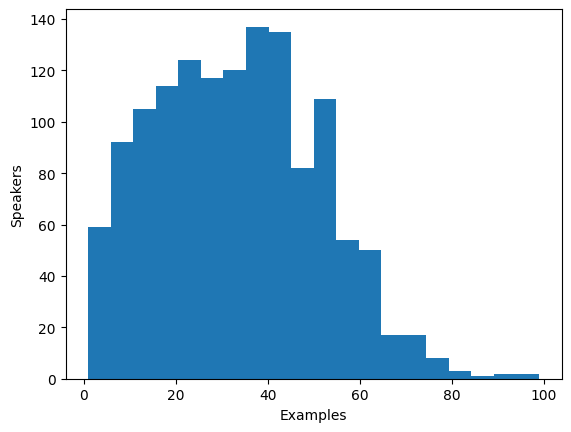

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(speaker_counts.values(), bins = 20)
plt.ylabel('Speakers')
plt.xlabel('Examples')
plt.show()

In [17]:
def select_speaker(speaker_id):
  return 0<=  speaker_counts[speaker_id] <=60

dataset = dataset.filter(select_speaker,input_columns=['speaker_id'])

In [18]:
len(set(dataset['speaker_id']))

1258

**Embedding Generation**

In [19]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

/tmp/ipykernel_164/598886239.py:3: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


In [20]:
spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name),
)

In [23]:
def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

**Dataset Processing**

In [24]:
def prepare_dataset(example):
    audio = example["audio_filepath"]

    example = processor(
        text=example["normalized"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

   
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

In [25]:
processed_example = prepare_dataset(dataset[0])
list(processed_example.keys())

2025-04-15 15:30:52.883623: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744731052.904609     164 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744731052.910692     164 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


['input_ids', 'labels', 'speaker_embeddings']

In [26]:
processed_example["speaker_embeddings"].shape

(512,)

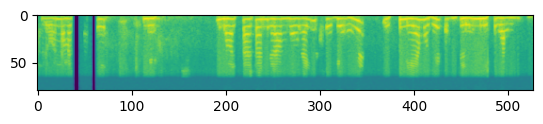

In [27]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

In [28]:
dataset = dataset.map(prepare_dataset, remove_columns=dataset.column_names)

Map:   0%|          | 0/38640 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (606 > 600). Running this sequence through the model will result in indexing errors


In [29]:
def is_not_long(input_ids):
  input_length = len(input_ids)
  return input_length < 400

dataset = dataset.filter(is_not_long, input_columns=["input_ids"])
len(dataset)

Filter:   0%|          | 0/38640 [00:00<?, ? examples/s]

37625

In [30]:
dataset = dataset.train_test_split(test_size=0.1)

In [40]:
# from dataclasses import dataclass
# from typing import Any, Dict, List, Union


# @dataclass
# class TTSDataCollatorWithPadding:
#     processor: Any

#     def __call__(
#         self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
#     ) -> Dict[str, torch.Tensor]:
#         input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
#         label_features = [{"input_values": feature["labels"]} for feature in features]
#         speaker_features = [feature["speaker_embeddings"] for feature in features]

#         # collate the inputs and targets into a batch
#         batch = processor.pad(
#             input_ids=input_ids, labels=label_features, return_tensors="pt"
#         )

#         # replace padding with -100 to ignore loss correctly
#         batch["labels"] = batch["labels"].masked_fill(
#             batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
#         )

#         # not used during fine-tuning
#         del batch["decoder_attention_mask"]

#         # round down target lengths to multiple of reduction factor
#         if model.config.reduction_factor > 1:
#             target_lengths = torch.tensor(
#                 [len(feature["input_values"]) for feature in label_features]
#             )
#             target_lengths = target_lengths.new(
#                 [
#                     length - length % model.config.reduction_factor
#                     for length in target_lengths
#                 ]
#             )
#             max_length = max(target_lengths)
#             batch["labels"] = batch["labels"][:, :max_length]

#         # also add in the speaker embeddings
#         batch["speaker_embeddings"] = torch.tensor(speaker_features)

#         # return batch

**Multiple speakers so we need to write custom data collector**

In [31]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids, labels=label_features, return_tensors="pt"
        )

   
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor(
                [len(feature["input_values"]) for feature in label_features]
            )
            target_lengths = target_lengths.new(
                [
                    length - length % model.config.reduction_factor
                    for length in target_lengths
                ]
            )
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

       
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [32]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

**Model Training**

In [33]:
from transformers import SpeechT5ForTextToSpeech

model = SpeechT5ForTextToSpeech.from_pretrained(checkpoint)

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [34]:
from functools import partial


model.config.use_cache = False

# set language and task for generation and re-enable cache
model.generate = partial(model.generate, use_cache=True)

In [36]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="speecht5_finetuned_IndiVoices_Hindi", 
    per_device_train_batch_size=4,
    gradient_accumulation_steps=8,
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=2000,
    gradient_checkpointing=True,
    fp16=True,
    eval_strategy="steps",
    per_device_eval_batch_size=2,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

In [1]:
# import torch
# from transformers import SpeechT5ForTextToSpeech  # Import the appropriate model class
# from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

# # Create a custom model class that overrides the forward method to handle empty tensors
# class CustomSpeechT5(SpeechT5ForTextToSpeech):
#     def forward(self, **kwargs):
#         outputs = super().forward(**kwargs)
        
#         # Monkey patch the guided attention loss calculation to handle empty tensors
#         original_compute_guided_attention_loss = self.compute_guided_attention_loss
        
#         def safe_compute_guided_attention_loss(*args, **compute_kwargs):
#             try:
#                 # Check if cross_attentions exists and is not empty
#                 if "cross_attentions" in compute_kwargs and compute_kwargs["cross_attentions"] is not None:
#                     if len(compute_kwargs["cross_attentions"]) == 0 or any(x is None for x in compute_kwargs["cross_attentions"]):
#                         return torch.tensor(0.0, device=self.device)
#                 return original_compute_guided_attention_loss(*args, **compute_kwargs)
#             except RuntimeError as e:
#                 if "expected a non-empty list of Tensors" in str(e):
#                     return torch.tensor(0.0, device=self.device)
#                 raise e
        
#         # Replace the method temporarily
#         self.compute_guided_attention_loss = safe_compute_guided_attention_loss
        
#         return outputs

# # Create a custom model from your existing model
# custom_model = CustomSpeechT5.from_pretrained(
#     model.config._name_or_path,  # Use the same pretrained model
#     config=model.config
# )
# # Copy the state dict from your original model if needed
# custom_model.load_state_dict(model.state_dict())

# # Replace TrainingArguments with Seq2SeqTrainingArguments
# training_args = Seq2SeqTrainingArguments(
#     output_dir="speecht5_finetuned_IndiVoices_Hindi",  # change to a repo name of your choice
#     per_device_train_batch_size=4,
#     gradient_accumulation_steps=8,
#     learning_rate=1e-5,
#     warmup_steps=500,
#     max_steps=4000,
#     gradient_checkpointing=True,
#     fp16=True,
#     eval_strategy="steps",
#     per_device_eval_batch_size=2,
#     save_steps=1000,
#     eval_steps=1000,
#     logging_steps=25,
#     report_to=["tensorboard"],
#     load_best_model_at_end=True,
#     greater_is_better=False,
#     label_names=["labels"],
#     push_to_hub=True,
# )

# # Use the custom model in your trainer
# trainer = Seq2SeqTrainer(
#     args=training_args,
#     model=custom_model,  # Use the custom model instead of the original
#     train_dataset=dataset["train"],
#     eval_dataset=dataset["test"],
#     data_collator=data_collator,
#     processing_class=processor,  # Using processing_class instead of tokenizer
# )


2025-04-15 14:27:08.024263: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744727228.192560      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744727228.240801      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


NameError: name 'model' is not defined

In [37]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor,
)

/tmp/ipykernel_164/1231872571.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [38]:
trainer.train()

Step,Training Loss,Validation Loss
1000,0.543800,0.502655
2000,0.511900,0.490868


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 1876}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=2000, training_loss=0.5796477084159851, metrics={'train_runtime': 6452.1683, 'train_samples_per_second': 9.919, 'train_steps_per_second': 0.31, 'total_flos': 1.3427325131248512e+16, 'train_loss': 0.5796477084159851, 'epoch': 1.8892038743208128})

**Pushing Mymodel to the Huggingface**

In [39]:
trainer.push_to_hub()

CommitInfo(commit_url='https://huggingface.co/PushAI/speecht5_finetuned_IndiVoices_Hindi/commit/6a2e5236045850725610adfcbb70aa5b3de2a4c3', commit_message='End of training', commit_description='', oid='6a2e5236045850725610adfcbb70aa5b3de2a4c3', pr_url=None, repo_url=RepoUrl('https://huggingface.co/PushAI/speecht5_finetuned_IndiVoices_Hindi', endpoint='https://huggingface.co', repo_type='model', repo_id='PushAI/speecht5_finetuned_IndiVoices_Hindi'), pr_revision=None, pr_num=None)

In [41]:
model = SpeechT5ForTextToSpeech.from_pretrained(
    "PushAI/speecht5_finetuned_IndiVoices_Hindi"
)

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/578M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

**Testing**

In [42]:
example = dataset["test"][304]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)

In [43]:
text = "हेलो नमस्ते मैं नमस्कार सर मेरा मोबाईल खो गया है इसलिए मुझे कॉम्प्लेन लिखवानी है"

In [44]:
inputs = processor(text=text, return_tensors="pt")

In [45]:
from transformers import SpeechT5HifiGan

vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")
speech = model.generate_speech(inputs["input_ids"], speaker_embeddings, vocoder=vocoder)

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/50.6M [00:00<?, ?B/s]

**Audio Generation**

In [46]:
from IPython.display import Audio

Audio(speech.numpy(), rate=16000)

**Note**: Due to the resource contraint this is trained only for 2 epoches and that's why the result is like this. If possible, allow it to train for 10 epoches and I assure you result would be better.


Further, score me on the basis of my approach and not on the basis of outcome because it has not been trained completely. I have been trying hard to train it from sunday but it won't worked out the way I wanted.